# Task1:修改有序抖動法中的順序矩陣
## 實習步驟: 
### Step1. 載入影像: 
1. 使用指令將 Image 從 PIL 中載入，並在 Image 中載入 matplotlib.pyplot，命名 plt

2. 使 Image.open 打開圖片並將之存入img

3. 使用 convert(‘L’)將之轉換成灰階，才不用處理 3 個 channel

4. 將圖片存成numpy array 後存入OriginalImage 中

In [9]:
import sys
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
from PIL import Image

(256, 256)


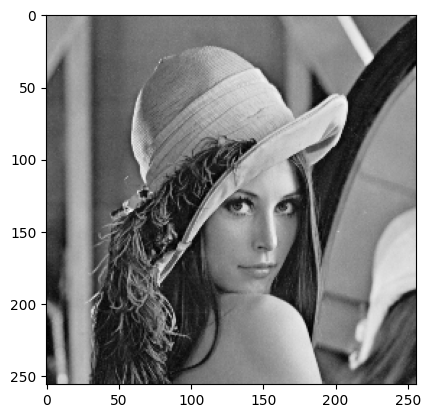

In [10]:
img = Image.open('./source/Pictrue.png')
img_gray = img.convert('L')
OriginalImage = np.array(img_gray)
print(OriginalImage.shape)
plt.imshow(OriginalImage, cmap='gray')

### Step2. 修改有序抖動法中的順序矩陣

In [11]:
DitherArray=[[0.513,0.272,0.724,0.483,0.543,0.302,0.694,0.453], #定義抖動矩陣
 [0.151,0.755,0.091,0.966,0.181,0.758,0.121,0.936], 
 [0.634,0.392,0.574,0.332,0.664,0.423,0.604,0.362],
 [0.060,0.875,0.211,0.815,0.030,0.906,0.241,0.845], 
 [0.543,0.302,0.694,0.453,0.513,0.272,0.724,0.483], 
 [0.181,0.758,0.121,0.936,0.151,0.755,0.091,0.936], 
 [0.664,0.423,0.604,0.362,0.634,0.392,0.574,0.332], 
 [0.030,0.906,0.241,0.845,0.060,0.875,0.211,0.815]]

### Step3. 區塊內的像素點與有序抖動矩陣位值之閥值進行比較:
1.  先宣告一個半色矩陣HalftoneImage為一個充滿0的numpy矩陣

2. 用兩個迴圈分割圖片為不重複的多個 8*8 區塊

3. 再用兩個迴圈將每一個8*8區塊內的像素點與相對於有序抖動矩陣位值之閥值進行比較，如果大於則該點為白(255)，反之為黑(0)

(256, 256)


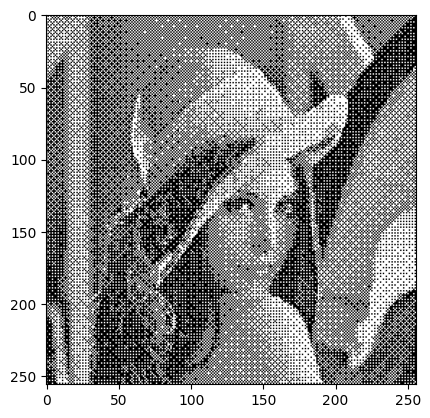

In [12]:
HalftoneImage=np.zeros((256, 256))
for i in range(0,256,8):
    for j in range(0,256,8):
        for x in range(0,8):
            for y in range(0,8):
                tempnumber = OriginalImage[i+x][j+y]/255.0
                if tempnumber<DitherArray[x][y]:
                    HalftoneImage [i+x][j+y]=0
                else:
                    HalftoneImage [i+x][j+y]=255
plt.imshow(HalftoneImage, cmap='gray')
print(HalftoneImage.shape)

### Step4. 畫出流程圖
![螢幕擷取畫面 2024-10-09 013415.png](<attachment:螢幕擷取畫面 2024-10-09 013415.png>)
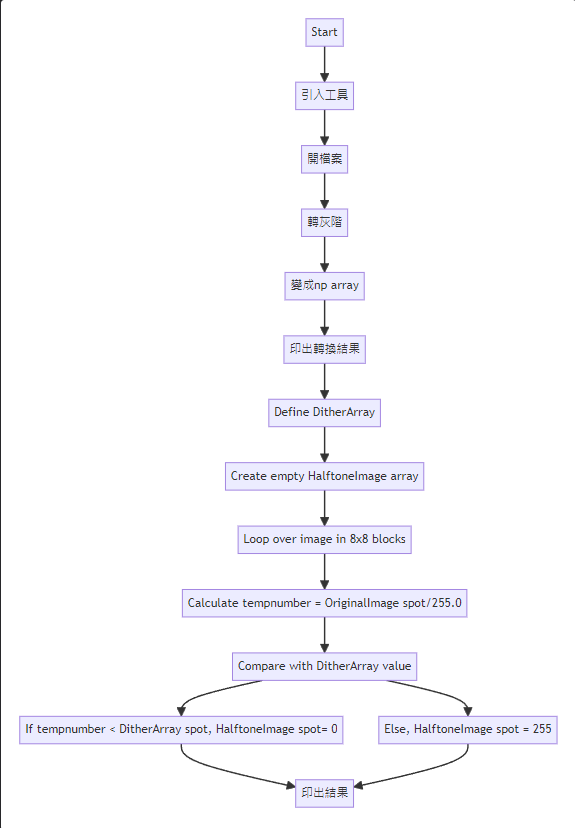

### 實驗結果
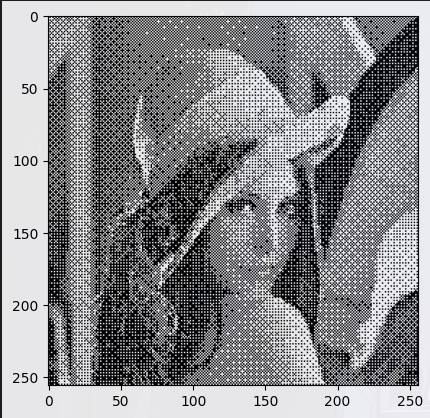

# Task2:修改錯誤擴散法中的擴散權重
## 實習步驟: 
### Step1. 載入影像(同前面敘述) 
### Step2. 將原始影像複製到半色矩陣中，直接在在半色矩陣做
### Step3. 定義擴散矩陣 
### Step4. 用兩個迴圈歷遍每一個像素，目前像素如大於等於128則該點為白(255)，反之則為黑(0)。並且將誤差依相對應位置與權重擴散出去。

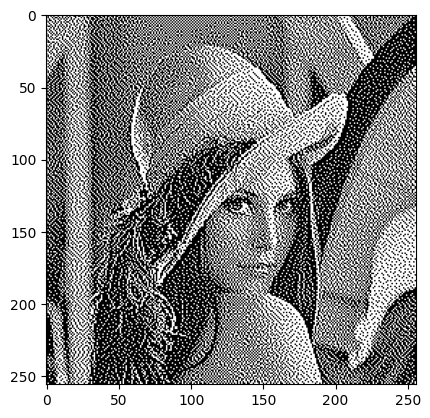

In [21]:
errorarry=[[0.0,0.0,0.0,0.19040, 0.095230],
           [0.04762,0.095230,0.19040, 0.095230,0.04762 ],
           [0.02381,0.047620,0.095230,0.047620,0.02381]]
HalftoneImage = OriginalImage.copy()
for i in range(0, 256):
    for j in range(0, 256):
        if HalftoneImage[i][j] < 128:
            errorvalue = (HalftoneImage[i][j] - 0)
            HalftoneImage[i][j] = 0
        else:
            errorvalue = (int(HalftoneImage[i][j])-255)
            HalftoneImage[i][j] = 255
        for x in range(0, 3):
            if ((i + x) >= 256):
                continue
            for y in range(-2, 3, 1):
                if((j + y) >= 0 and (j + y) < 256):
                    HalftoneImage[i+x][y+j] += errorarry[x][y+2]*errorvalue
                else:
                    continue
plt.imshow(HalftoneImage, cmap='gray')

### 流程圖
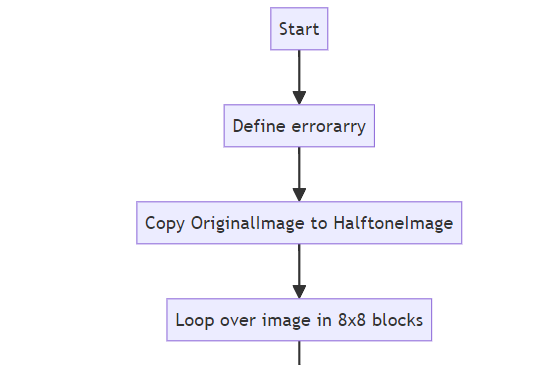
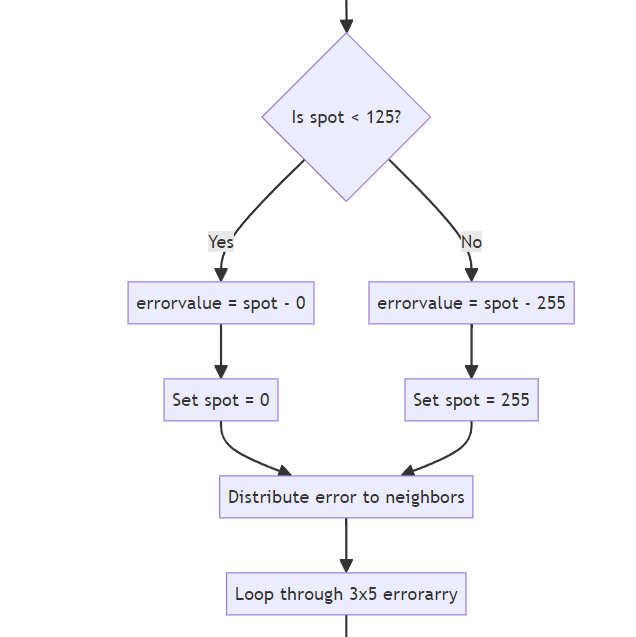
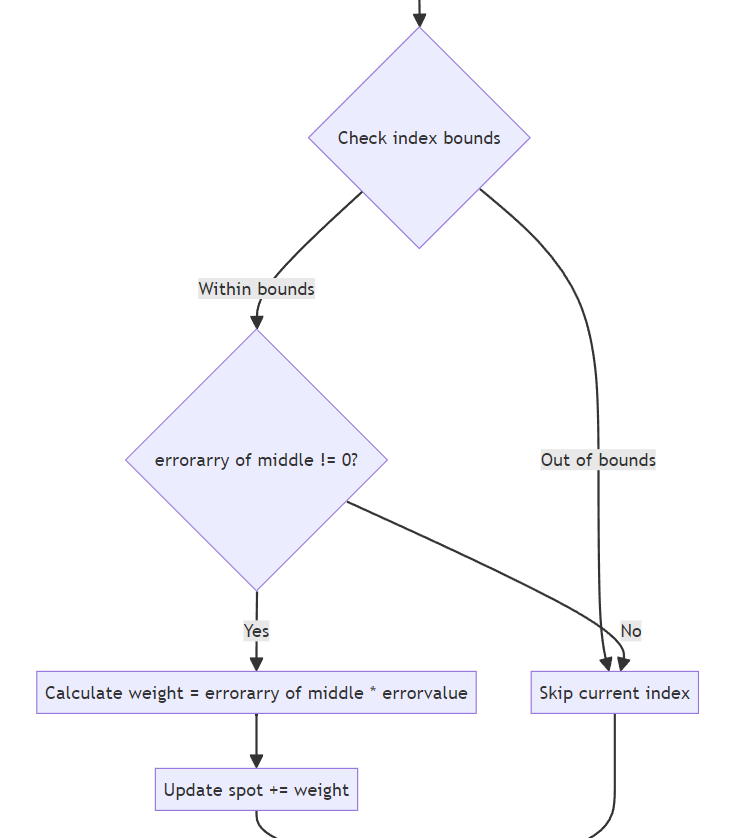
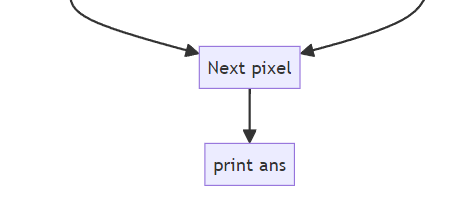

### 實驗結果
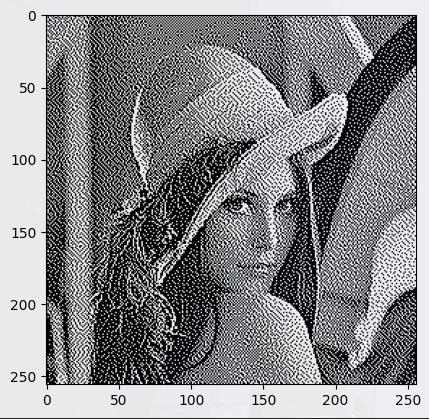

## Task3: 修改點擴散法中的擴散順序矩陣與擴散權重矩陣 
### 實習步驟:
#### Step1. 載入影像(同前面敘述) 
#### Step2. 將原始影像複製到半色矩陣中，直接在在半色矩陣做運算(同前面敘述)
#### Step3. 定義擴散順序陣列與擴散權重陣列


In [14]:
from skimage import io,color
import numpy as np
import matplotlib.pyplot as plt

from skimage import io,color
import numpy as np
import matplotlib.pyplot as plt

ClassMatrix = np.array([
    [204,  0,  5, 33, 51, 59, 23,118, 54, 69, 40,160,169,110,168,188],
    [  3,  6, 22, 36, 60, 50, 74,115,140, 82,147,164,171,142,220,214],
    [ 14,  7, 42, 16, 63, 52, 94, 56,133,152,158,177,179,208,222,  1],
    [ 15, 26, 43, 75, 79, 84,148, 81,139,136,166,102,217,219,226,  4],
    [ 17, 39, 72, 92,103,108,150,135,157,193,190,100,223,225,227, 13],
    [ 28,111, 99, 87,116,131,155,112,183,196,181,224,232,228, 12, 21],
    [ 47,120, 91,105,125,132,172,180,184,205,175,233,245,  8, 20, 41],
    [ 76, 65,129,137,165,145,178,194,206,170,229,244,246, 19, 24, 49],
    [ 80, 73,106,138,176,182,174,197,218,235,242,249,247, 18, 48, 68],
    [101,107,134,153,185,163,202,173,231,241,248,253, 44, 88, 70, 45],
    [123,141,149, 61,195,200,221,234,240,243,254, 38, 46, 77,104,109],
    [ 85, 96,156,130,203,215,230,250,251,252,255, 53, 62, 93, 86,117],
    [151,167,189,207,201,216,236,239, 25, 31, 34,113, 83, 95,124,114],
    [144,146,191,209,213,237,238, 29, 32, 55, 64, 97,126, 78,128,159],
    [187,192,198,212,  9, 10, 30, 35, 58, 67, 90, 71,122,127,154,161],
    [199,210,211,  2, 11, 27, 37, 57, 66, 89, 98,121,119,143,162,186]
])
ErrorArray = np.array([
    [0.38459, 1, 0.38459],
    [1, 0, 1],
    [0.38459, 1, 0.38459]
])

#### Step4. 修改有關擴散順序矩陣大小的程式碼 
1. 第一個迴圈k代表歷便一個16*16大小的擴散順序矩陣

2. 第二、三個迴圈i和迴圈j將 256 * 256大小圖片切成16*16大小的方塊 
 
3. 迴圈x和迴圈y將圖片依照切好的16*16大小方塊歷便，照相對應擴散順序矩陣由小到大進行處理，目前像素如大於等於128則該點為白(255)，反之則為黑(0)

4. 迴圈p和迴圈q歷便擴散權重矩陣，將方才經接處理成像數點由灰階數值變為255或0的誤差值組成的資料，乘上相對擴散誤差權重加到相對應之位置 

In [15]:
image = io.imread("./source/Pictrue.png")
grayImage = color.rgb2gray(image)* 255 #這邊255必家 rbg2gray是把image變成0~1而非 0~255
HalftoneImage = np.array(grayImage)
height, width = HalftoneImage.shape
block_size = ClassMatrix.shape[0]
if width % block_size != 0 or height % block_size != 0:
    raise ValueError(f"圖片的寬度和高度必須是 block_size 的倍數")
for k in range(0,block_size*block_size):
    for i in range(0, width, block_size):
        for j in range(0, height , block_size):
            for x in range(block_size):
                for y in range(block_size):
                    if(k == ClassMatrix[x][y]):
                        pixels_x = i + x
                        pixels_y = j + y
                        pixel_value = HalftoneImage[pixels_x , pixels_y]
                        new_value = 255 if pixel_value >= 128 else 0
                        error = int(pixel_value) - 255 if pixel_value >= 128 else int(pixel_value)
                        HalftoneImage[pixels_x , pixels_y] = new_value
                        
                        #計算權重
                        allweight = 0
                        for index_x in range(-1 , 2):
                            if pixels_x+index_x  >= width or pixels_x+index_x  < 0 : 
                                continue
                            for index_y in range(-1 , 2):
                                if pixels_y+index_y < 0 or pixels_y+index_y >= height:
                                    continue 
                                neighbor_x = (x+index_x)%block_size if (x+index_x)>=0 else ((x+index_x))+block_size
                                neighbor_y = (y+index_y)%block_size if (y+index_y)>=0 else ((y+index_y))+block_size
                                weight = ErrorArray[index_x+1][index_y+1]
                                if ClassMatrix[neighbor_x, neighbor_y] > k  :
                                    allweight += weight
                        #分配權重並混色
                        if allweight != 0:
                            for index_x in range(-1 , 2):
                                if pixels_x+index_x  >= width or pixels_x+index_x  < 0 : 
                                    continue
                                for index_y in range(-1 , 2):
                                    if pixels_y+index_y < 0 or pixels_y+index_y >= height:
                                        continue
                                    neighbor_x = (x+index_x)%block_size if (x+index_x)>=0 else ((x+index_x))+block_size
                                    neighbor_y = (y+index_y)%block_size if (y+index_y)>=0 else ((y+index_y))+block_size
                                    weight = ErrorArray[index_x+1][index_y+1]
                                    if ClassMatrix[neighbor_x, neighbor_y] > k:
                                        HalftoneImage[pixels_x+index_x][pixels_y+index_y]+= error * (weight / allweight)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

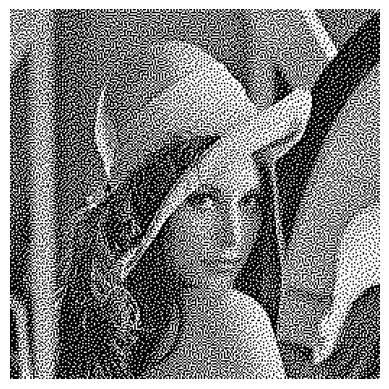

In [16]:
plt.imshow(HalftoneImage,cmap='gray')
plt.axis('off')

### Step5. 使用 hack.md 畫出流程圖
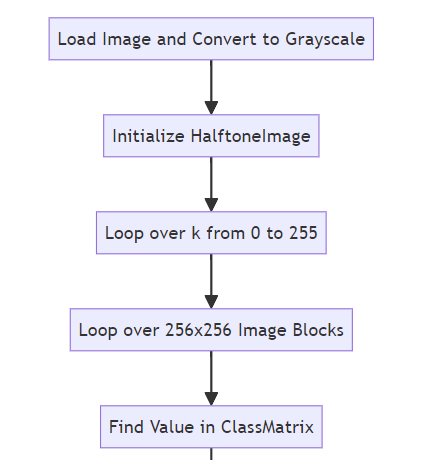
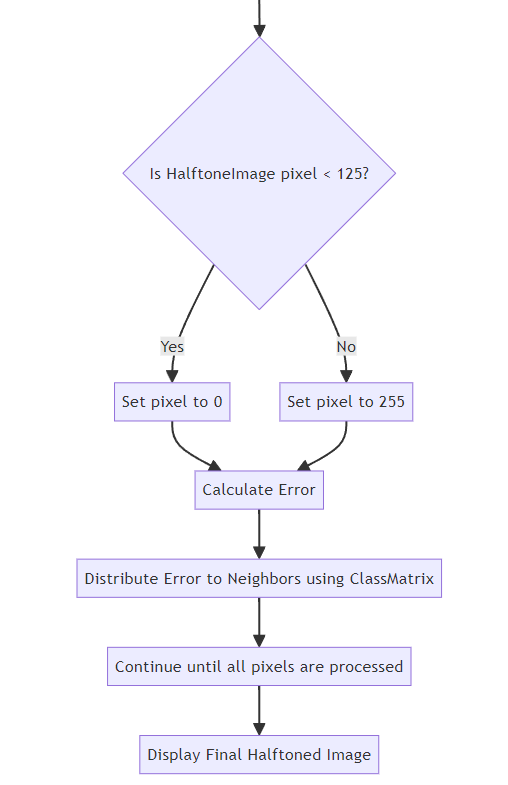

## 實驗結果: 
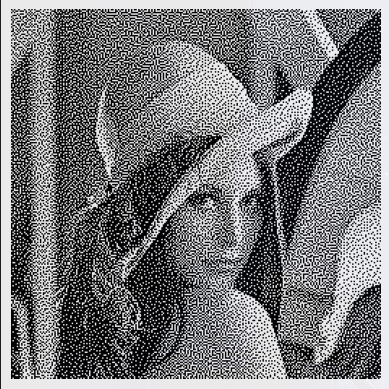

### 心得: 
&emsp;&emsp;這次的作業我卡在點擴散法非常久，花了比預期多的時間;老師的ppt著實錯到我改程式改到半夜...但也經由此次更深的認識到何謂圖像處理，令我收益良多。